In [1]:
# Install packages required

import sys
!{sys.executable} -m pip install --user pandas matplotlib PyQt5 sklearn tensorflow

In [2]:
# imports

import pandas as pd
import matplotlib.pyplot as plotter
import PyQt5

#Classifier imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing, utils

# Performance metrics
from sklearn.metrics import accuracy_score, classification_report, r2_score, mean_squared_error
from math import sqrt


In [3]:
# Fetch data from CSV file

RawData = pd.read_csv('./Data/Fish.csv')
RawData["Species"]= RawData["Species"].astype(str) 
RawData.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
# Check key data attributes

print('Data Description\n--------------\n',RawData.describe())
print('\n\nData Types\n--------------\n',RawData.dtypes)
print('\n\nData Nas\n--------------\n',RawData.isna().sum())
print('\n\nData Nulls\n--------------\n',RawData.isnull().sum())
print('\n\nData Correlation\n--------------\n',RawData.corr())
print('\n\nSpecies Counts\n--------------\n',RawData.Species.value_counts(sort=True))
print('\n\nWeight Null Counts\n--------------\n',RawData.Weight[RawData['Weight'] == 0].sum())
print('\n\nLength1 Null Counts\n--------------\n',RawData.Length1[RawData['Length1'] == 0].sum())
print('\n\nLength2 Null Counts\n--------------\n',RawData.Length2[RawData['Length2'] == 0].sum())
print('\n\nLength3 Null Counts\n--------------\n',RawData.Length3[RawData['Length3'] == 0].sum())
print('\n\nHeight Null Counts\n--------------\n',RawData.Height[RawData['Height'] == 0].sum())
print('\n\nWidth Null Counts\n--------------\n',RawData.Width[RawData['Width'] == 0].sum())

Data Description
--------------
             Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


Data Types
--------------
 Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object


Data Nas
--------------
 Species    0
Weight     0
Length1    0
Length2    0
L

Text(0.5, 0.98, 'Fish Market')

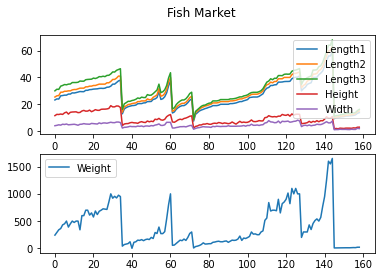

In [5]:
# Plotting data

# Uncomment the below line to open plots in a separate interactive window
# %matplotlib qt

# Uncomment the below line to open plots inline
%matplotlib inline

fig = plotter.figure()

ax1 = plotter.subplot2grid((2, 1), (0, 0))
ax2 = plotter.subplot2grid((2, 1), (1, 0), sharex=ax1)

ax1.plot(RawData[['Length1','Length2','Length3', 'Height','Width']])
ax2.plot(RawData[['Weight']])

ax1.legend(['Length1','Length2','Length3', 'Height','Width'])
ax2.legend(['Weight'])

plotter.suptitle('Fish Market')

# RawData[['Length1','Length2','Length3', 'Height','Width']].plot()
# plotter.show()

In [6]:
# Split Data into Features & Target

features = RawData[['Length1',
                    'Length2',
                    'Length3', 
                    'Height',
                    'Width',
                    'Weight']]

target = RawData[['Species']]

In [7]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)

In [8]:
# Initialize our classifiers
gnb = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=1)
MNB = MultinomialNB()
BNB = BernoulliNB()
LR = LogisticRegression()
SGD = SGDClassifier()
SVC = SVC()
LSVC = LinearSVC()
RFC = RandomForestClassifier(n_estimators = 50, n_jobs=4, max_depth=100)

In [9]:
# Train our classifier and test predict

# Gaussian Naive Bayes

gnb.fit(features_train, target_train)
y2_GNB_model = gnb.predict(features_test)
print("GaussianNB Accuracy :", accuracy_score(target_test, y2_GNB_model))

GaussianNB Accuracy : 0.5625


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# K-Nearest Neighbour

KNN.fit(features_train, target_train)
y2_KNN_model = KNN.predict(features_test)
print("KNN Accuracy :", accuracy_score(target_test, y2_KNN_model))

KNN Accuracy : 0.53125


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# Multinomial Naive Bayes

MNB.fit(features_train, target_train)
y2_MNB_model = MNB.predict(features_test)
print("MNB Accuracy :", accuracy_score(target_test, y2_MNB_model))

MNB Accuracy : 0.4375


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
# Bernoulli Naive Bayes

BNB.fit(features_train, target_train)
y2_BNB_model = BNB.predict(features_test)
print("BNB Accuracy :", accuracy_score(target_test, y2_BNB_model))

BNB Accuracy : 0.3125


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# Linear Regression

LR.fit(features_train, target_train)
y2_LR_model = LR.predict(features_test)
print("LR Accuracy :", accuracy_score(target_test, y2_LR_model))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LR Accuracy : 0.8125


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
# Stochastic Gradient Descent Regression

SGD.fit(features_train, target_train)
y2_SGD_model = SGD.predict(features_test)
print("SGD Accuracy :", accuracy_score(target_test, y2_SGD_model))

SGD Accuracy : 0.25


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# Support Vector Machine

SVC.fit(features_train, target_train)
y2_SVC_model = SVC.predict(features_test)
print("SVC Accuracy :", accuracy_score(target_test, y2_SVC_model))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC Accuracy : 0.5


In [16]:
# Linear Support Vector Machine

LSVC.fit(features_train, target_train)
y2_LSVC_model = LSVC.predict(features_test)
print("LSVC Accuracy :", accuracy_score(target_test, y2_LSVC_model))

LSVC Accuracy : 0.4375


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
# Random Forest Classifier

RFC.fit(features_train, target_train)
y2_RFC_model = RFC.predict(features_test)
print("RFC Accuracy :", accuracy_score(target_test, y2_RFC_model))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RFC Accuracy : 0.84375


In [18]:
# Since Random Forest Classifier gives us the maximum accuracy, we will use it for our predictions

RFC.fit(features, target)

# METHOD for Prediction

def PredictSpecies(Weight, Length1, Length2, Length3, Height, Width):
    input = pd.DataFrame({
        'Weight':[Weight],
        'Length1,':[Length1],
        'Length2':[Length2],
        'Length3':[Length3],
        'Height':[Height],
        'Width':[Width]
    })
    out = RFC.predict(input)
    print(out)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# Predictions

PredictSpecies(240, 22, 24, 31, 12, 4)

['Bream']
